In [191]:
# Importing the required libraries 
import pandas as pd 
import seaborn as sns

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

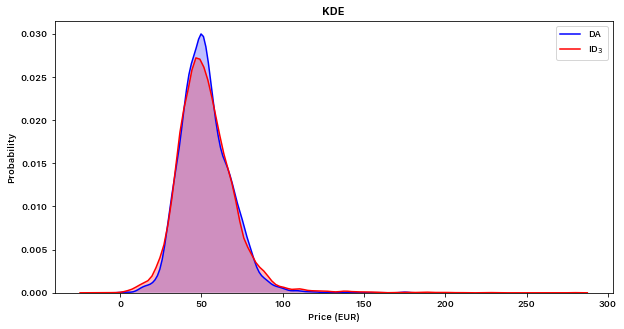

In [192]:
DA = pd.read_pickle(f"./DA.pkl")
ID = pd.read_pickle(f"./ID3.pkl")

DA = DA.set_index('Instrument')
ID = ID.set_index('Instrument')

DA = DA.loc[(DA.index.year == 2018)]
ID = ID.loc[(ID.index.year == 2018)]

# Plotting the KDE Plot 
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(DA['MCP'], color = 'b', shade = True, label = r'DA')
sns.kdeplot(ID['ID3'], color = 'r', shade = True, label = r'ID$_3$')

ax.set_title(f'KDE')
ax.set_xlabel(r'Price (EUR)')
ax.set_ylabel(r'Probability');

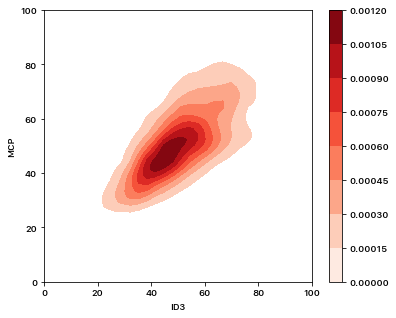

In [193]:
price = pd.merge(DA, ID, left_index=True, right_index=True, how='outer')

price = price.dropna()
price = price.reset_index()

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = price['ID3']
y = price['MCP']
sns.kdeplot(x, y, color='r', shade=True, cmap="Reds", shade_lowest=False, cbar=True);

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

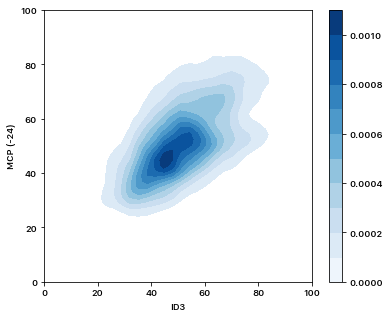

In [194]:
lag = 24
price[f'MCP (-{lag})'] = price['MCP'].shift(-lag)
price = price.dropna()

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = price['ID3']
y = price[f'MCP (-{lag})']
sns.kdeplot(x, y, color='r', shade=True, cmap="Blues", shade_lowest=False, cbar=True);

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

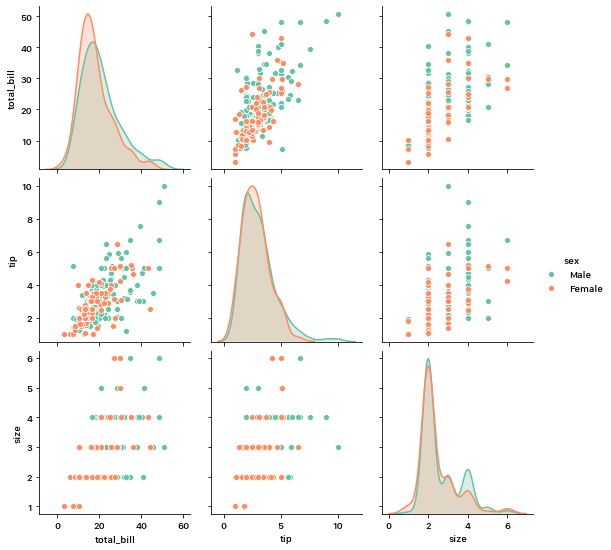

In [195]:
tips = sns.load_dataset("tips")

sns.pairplot(tips, hue = "sex", palette="Set2")

In [196]:
price['Month'] = price['Instrument'].dt.month

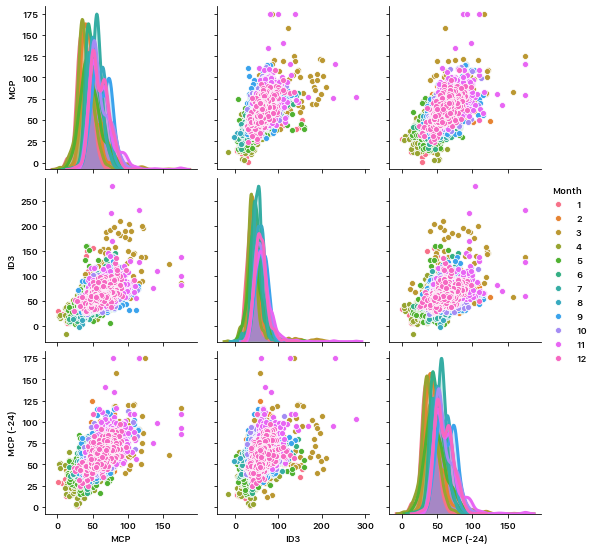

In [197]:
x = price['ID3']
y = price['MCP']

g = sns.pairplot(price, hue='Month')
g = g.map_diag(sns.kdeplot, lw=3)
# g = g.map_offdiag(sns.kdeplot, lw=1)